In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is B
 Volume Serial Number is 1E91-9C51

 Directory of C:\Users\91767\Downloads\ASSIGNMENTS\DECISION TREE

10-03-2023  01:08    <DIR>          .
04-03-2023  00:07    <DIR>          ..
09-03-2023  15:08    <DIR>          .ipynb_checkpoints
16-02-2023  16:03            17,023 Company_Data.csv
10-03-2023  00:53         2,897,637 decision tree (company data).ipynb
10-03-2023  01:08         3,018,188 decision tree (fraud data).ipynb
16-02-2023  16:03            21,837 Fraud_check.csv
               4 File(s)      5,954,685 bytes
               3 Dir(s)  166,657,937,408 bytes free


In [3]:
ft=pd.read_csv("Fraud_check.csv")
ft.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


# EDA

In [4]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
ft.shape

(600, 6)

In [6]:
ft.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
ft.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
ft.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
513,NO,Divorced,55308,140400,10,NO
115,YES,Divorced,79357,78251,21,YES
209,YES,Single,99307,186239,25,YES
285,NO,Single,77511,63420,10,NO
301,YES,Married,10900,39797,11,NO


# Checking taxable_income values smaller then 30000

In [9]:
ft[ft['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


# PAIR PLOT

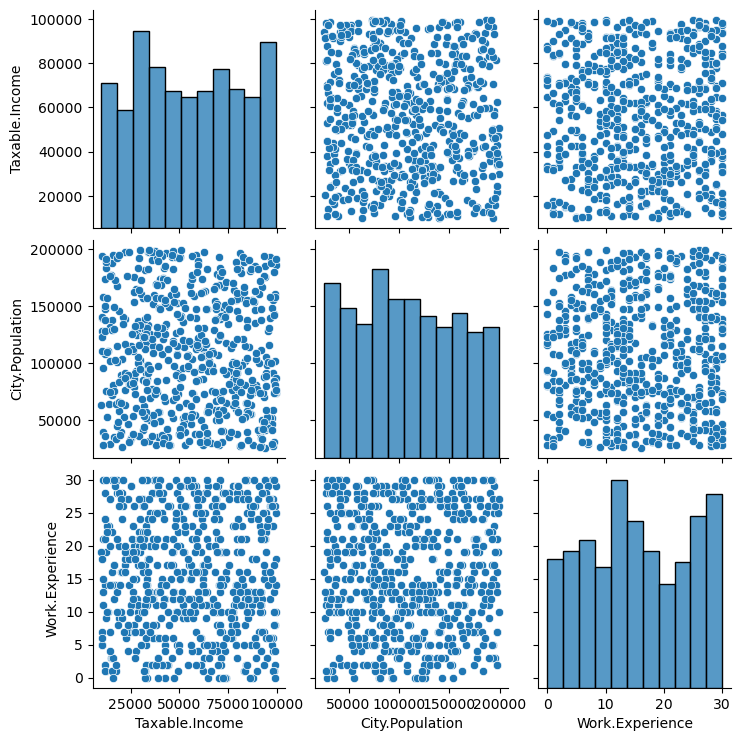

In [10]:
sns.pairplot(ft)

# DATA PREPROCESSING

# convert Taxable.income variables into categorical as Good and Risky

In [11]:
mj=['risky','good']
ft['TI']=pd.cut(ft['Taxable.Income'],bins=[0,30000,1000000],labels=mj)

In [12]:
for i in range(0,len(ft['Taxable.Income'])):
    if ft['Taxable.Income'][i]<=30000:
        ft['TI'][i]='risky'
    else:
            ft['TI'][i]='good'

In [13]:
ft

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TI
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [14]:
# counting values of Taxable.income
ft["TI"].value_counts()

good     476
risky    124
Name: TI, dtype: int64

# coverting other attributes to numerical

In [15]:
ft["TI"]=ft["TI"].replace(['risky','good'],[0,1])
ft["Marital.Status"]=ft["Marital.Status"].replace(['Single','Divorced','Married'],[0,1,2])
ft["Urban"]=ft["Urban"].replace(['YES','NO'],[1,0])
ft["Undergrad"]=ft["Undergrad"].replace(['YES','NO'],[1,0])


In [16]:
ft.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TI
595,1,1,76340,39492,7,1,1
596,1,1,69967,55369,2,1,1
597,0,1,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1
599,0,1,96519,158137,16,0,1


In [17]:
ft['TI'].value_counts()

1    476
0    124
Name: TI, dtype: int64

In [18]:
ft['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

# splitting data into X and Y by creating a new data frame

In [19]:
ft1=ft[['Undergrad','Marital.Status','City.Population',
       'Work.Experience','Urban','TI']]

In [20]:
ft1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TI
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1
...,...,...,...,...,...,...
595,1,1,39492,7,1,1
596,1,1,55369,2,1,1
597,0,1,154058,0,1,1
598,1,2,180083,17,0,1


# Model building

In [21]:
x=ft1.iloc[:,:-1]
y=ft1.iloc[:,-1]

In [22]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,1,39492,7,1
596,1,1,55369,2,1
597,0,1,154058,0,1
598,1,2,180083,17,0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: category
Categories (2, int64): [0 < 1]

# Splitting data into testing and training data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=20)


In [25]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
493,0,2,103226,29,0
172,0,2,52819,23,1
352,0,1,72115,16,1
506,0,0,111105,8,1
595,1,1,39492,7,1
...,...,...,...,...,...
25,0,1,124606,27,1
389,1,0,183187,5,1
28,1,0,128766,5,1
228,0,2,100696,9,1


In [26]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
256,1,2,168568,14,0
98,1,2,77053,18,1
345,1,1,118798,6,0
594,0,2,97526,9,1
383,1,2,148246,5,1
...,...,...,...,...,...
218,0,2,38091,19,0
223,1,2,192297,17,1
271,0,0,183682,20,0
474,1,1,80729,0,0


In [27]:
y_test

493    0
172    0
352    0
506    0
595    1
      ..
25     1
389    1
28     0
228    0
296    1
Name: TI, Length: 300, dtype: category
Categories (2, int64): [0 < 1]

In [28]:
y_train

256    1
98     0
345    1
594    1
383    1
      ..
218    1
223    1
271    1
474    1
355    1
Name: TI, Length: 300, dtype: category
Categories (2, int64): [0 < 1]

# Building a model using C5.0 (ENTROPY) Algorithm

In [29]:
model1=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

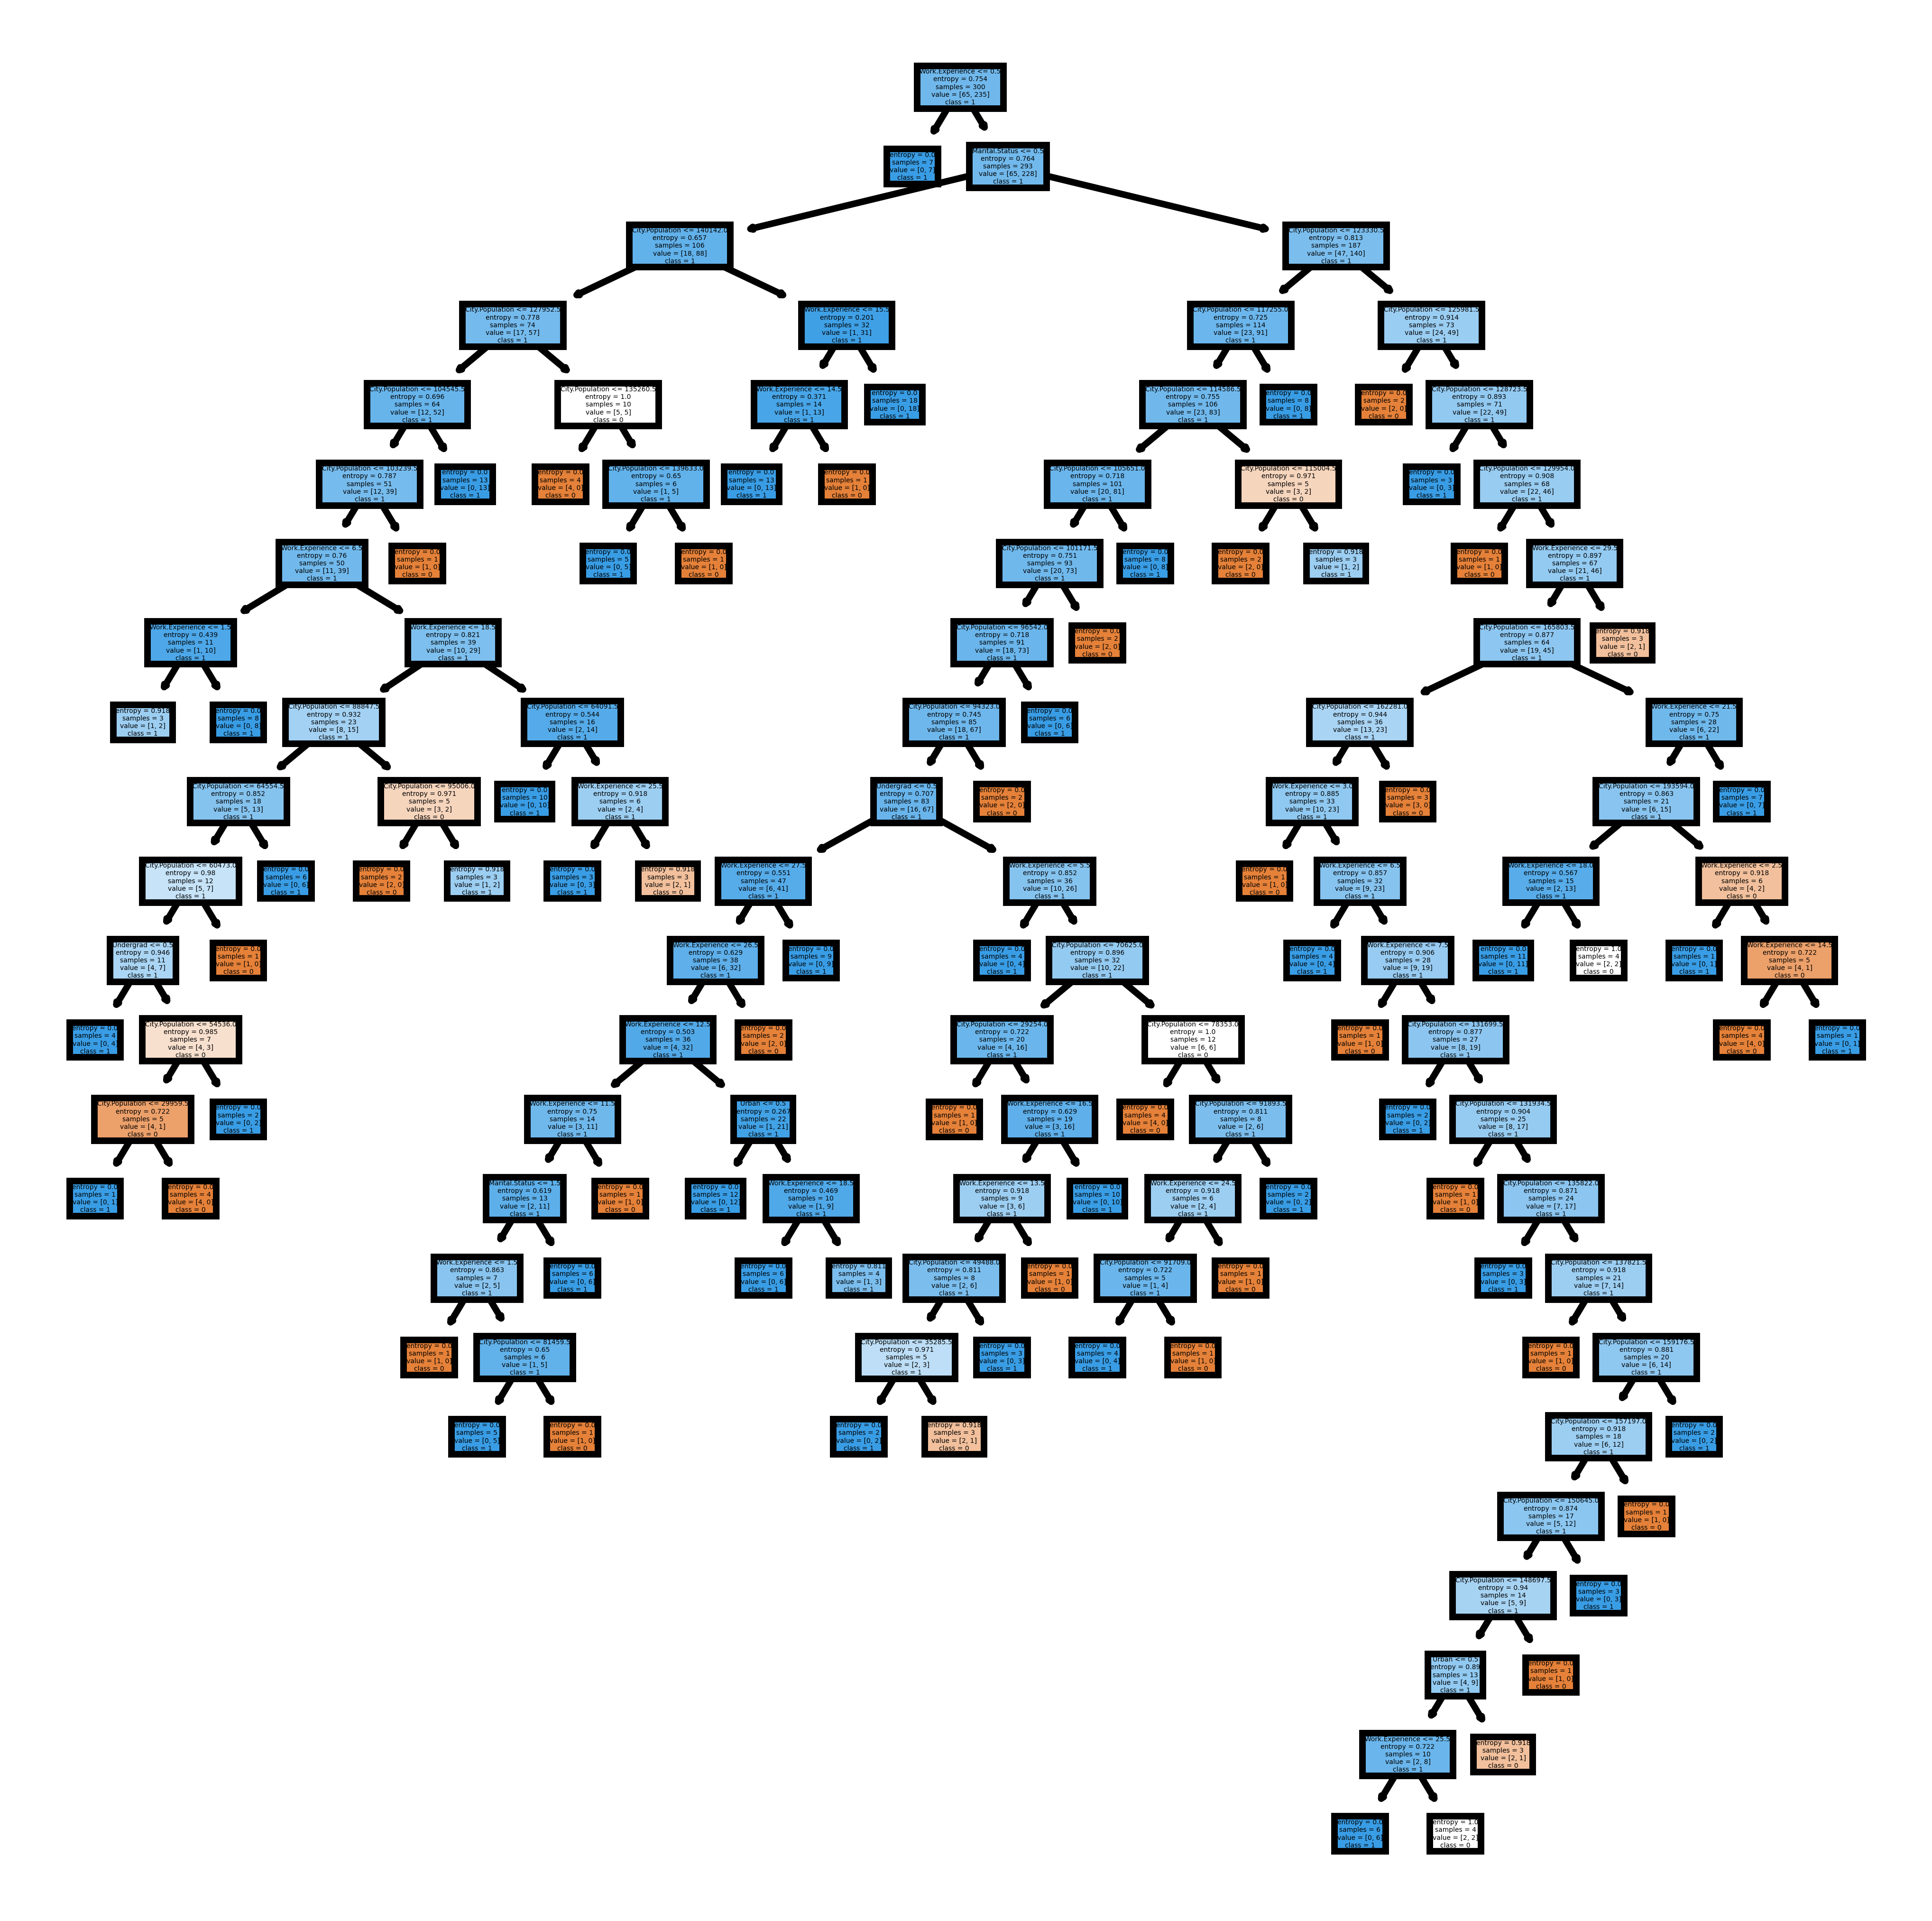

In [30]:
ft11=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cs=['0','1']
fig,axes=plt.subplots(figsize=(5,5),dpi=1000)
tree.plot_tree(model1,feature_names=ft11,class_names=cs,filled=True);
plt.show()

In [31]:
pred=model1.predict(x_test)

In [32]:
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], d

In [33]:
pd.crosstab(y_test,pred)

col_0,0,1
TI,,
0,12,47
1,66,175


In [34]:
from sklearn import metrics

In [35]:
metrics.accuracy_score(pred,y_test)

0.6233333333333333

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.15      0.20      0.18        59
           1       0.79      0.73      0.76       241

    accuracy                           0.62       300
   macro avg       0.47      0.46      0.47       300
weighted avg       0.66      0.62      0.64       300



# Build a model using CART (GINI) Algorithm

In [37]:
model2=DecisionTreeClassifier(criterion='gini',min_samples_split=4)

In [38]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=4)

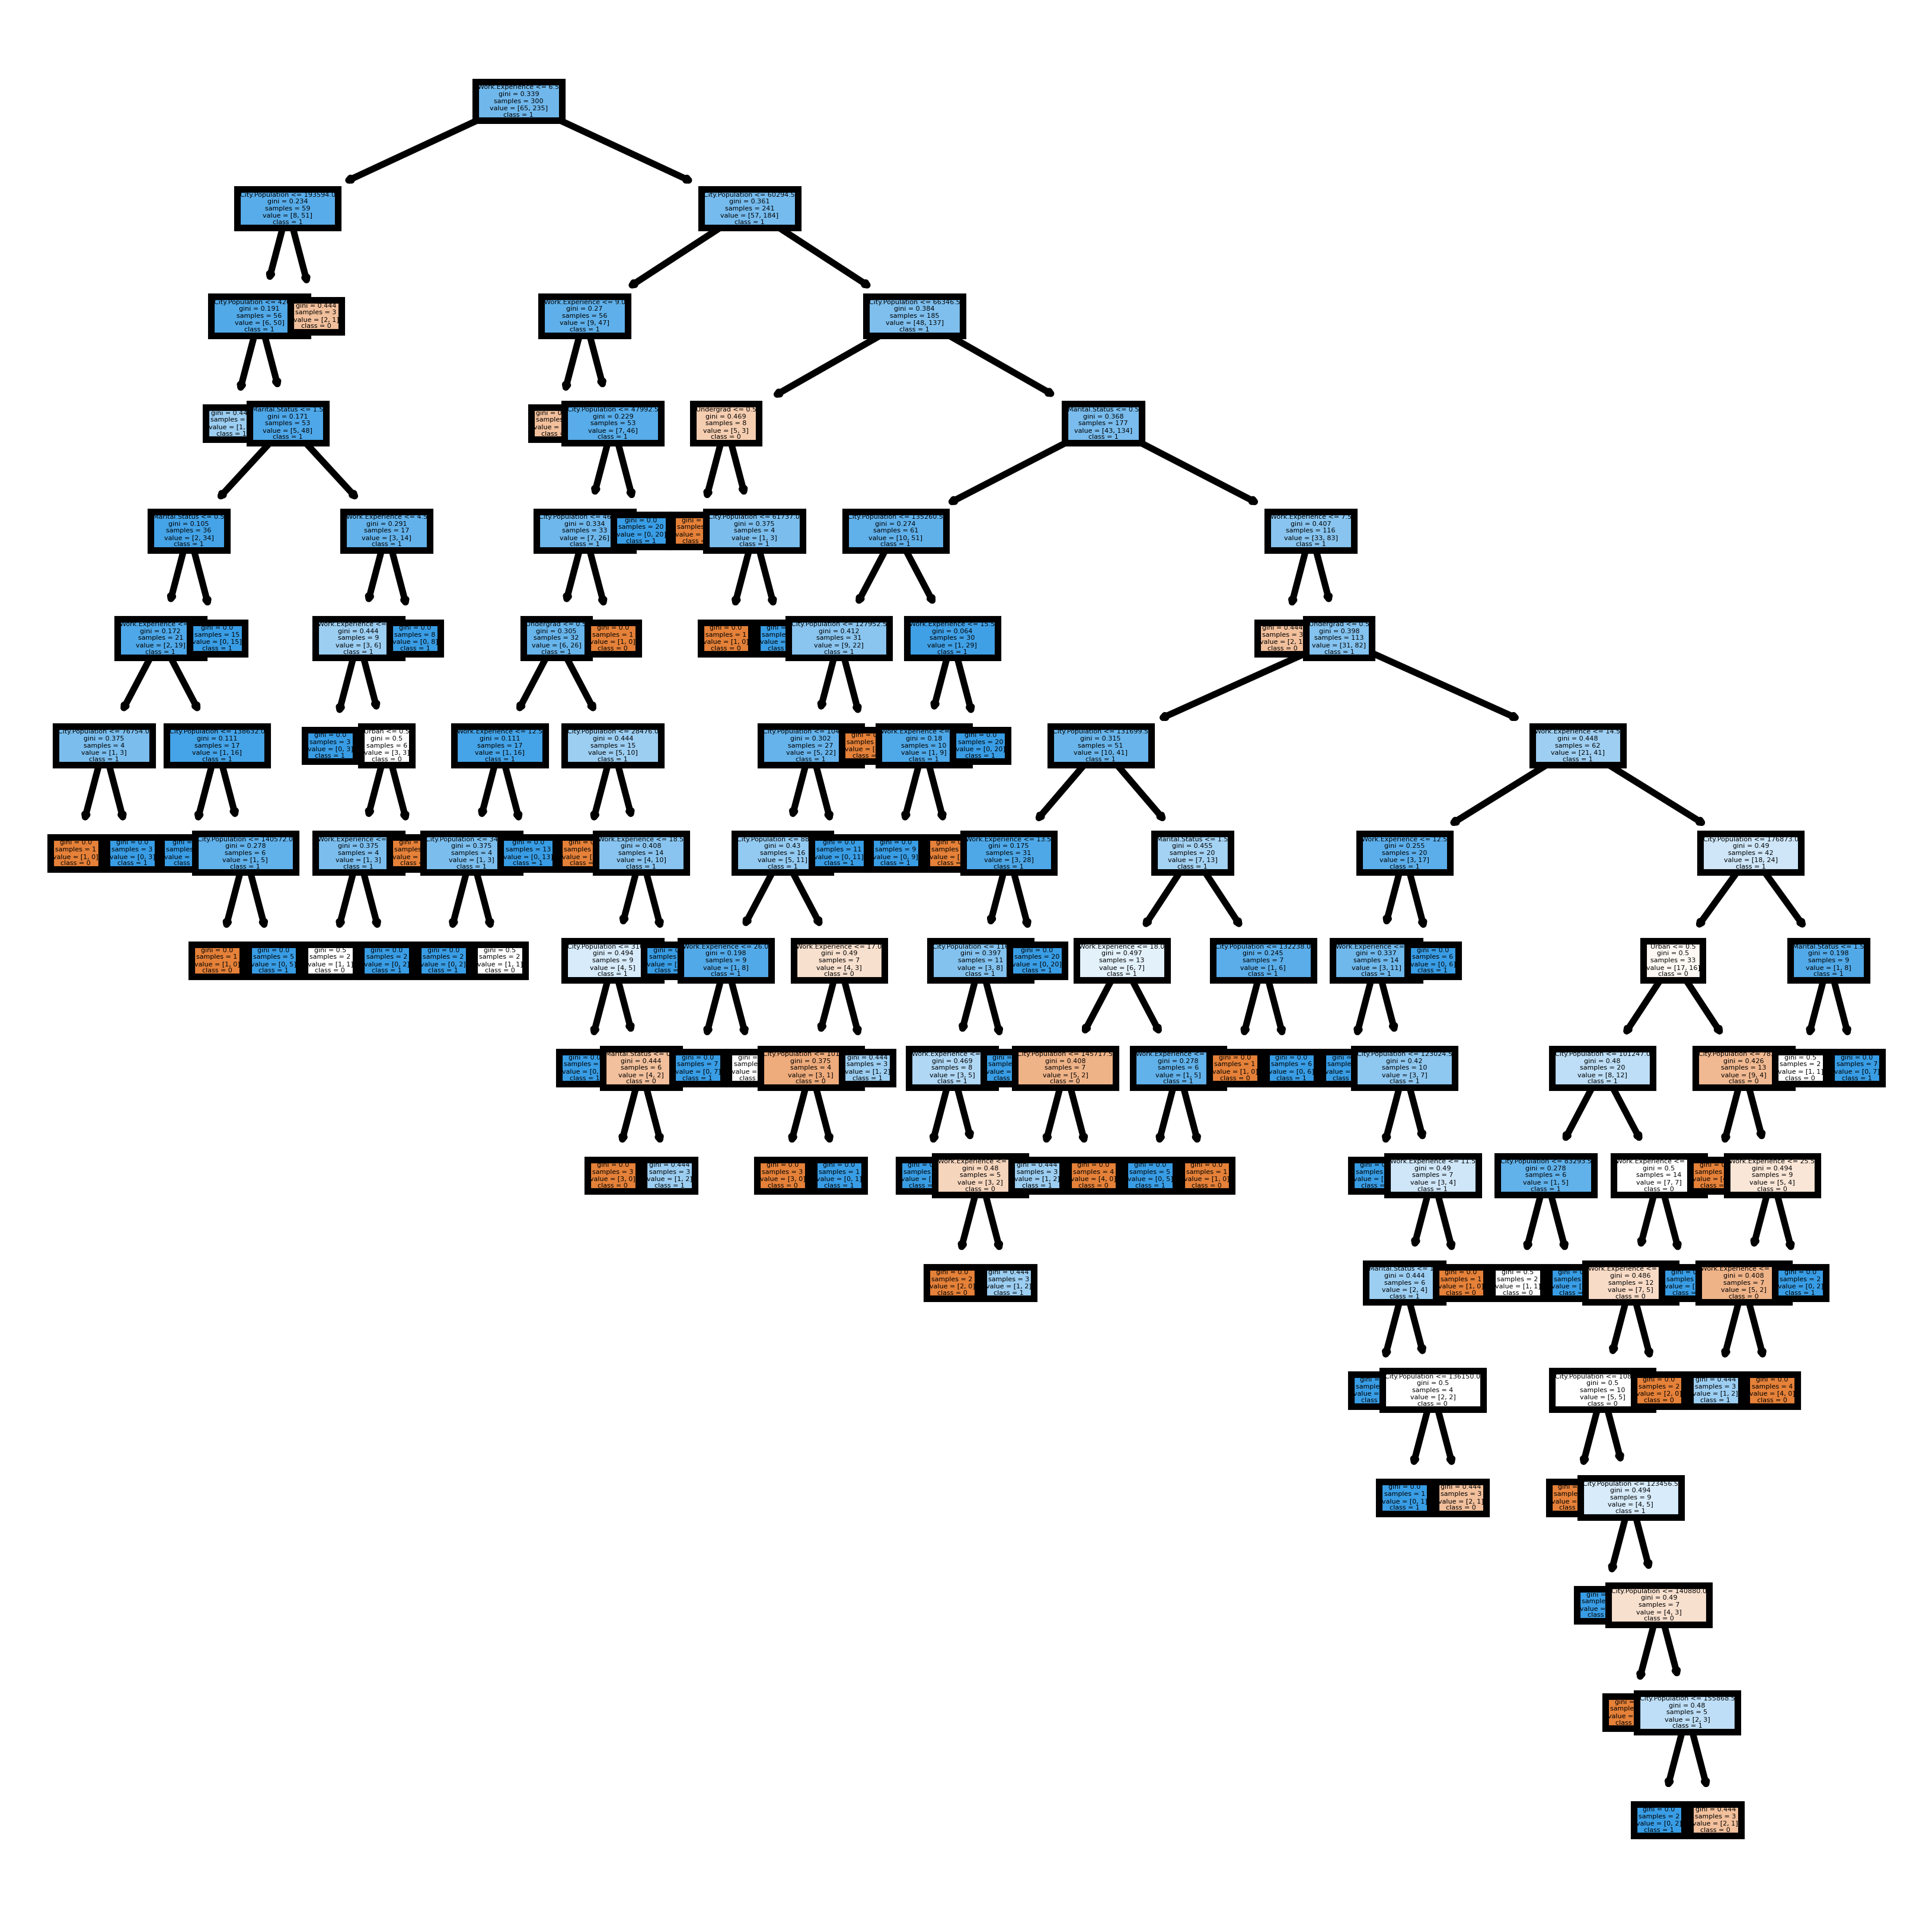

In [39]:
ft11=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cs=['0','1']
fig,axes=plt.subplots(figsize=(5,5),dpi=800)
tree.plot_tree(model2,feature_names=ft11,class_names=cs,filled=True);
plt.show()

In [40]:
predss=model2.predict(x_test)

In [41]:
predss

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], d

In [42]:
pd.crosstab(y_test,predss)

col_0,0,1
TI,,
0,10,49
1,58,183


In [43]:
metrics.accuracy_score(predss,y_test)

0.6433333333333333

In [44]:
print(classification_report(y_test,predss))

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        59
           1       0.79      0.76      0.77       241

    accuracy                           0.64       300
   macro avg       0.47      0.46      0.47       300
weighted avg       0.66      0.64      0.65       300

